In [2]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [3]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

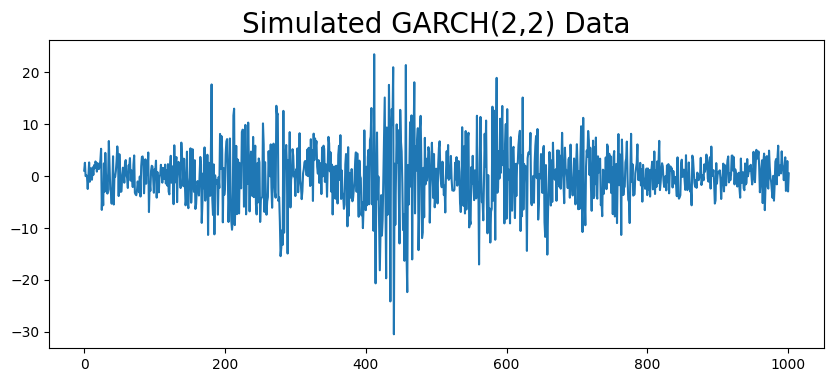

In [4]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

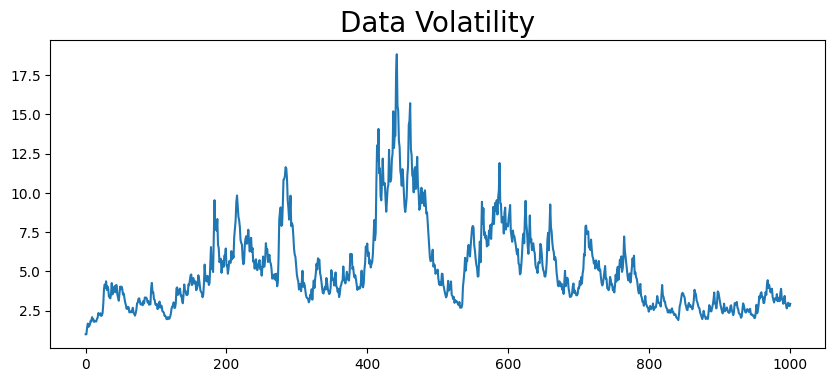

In [5]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

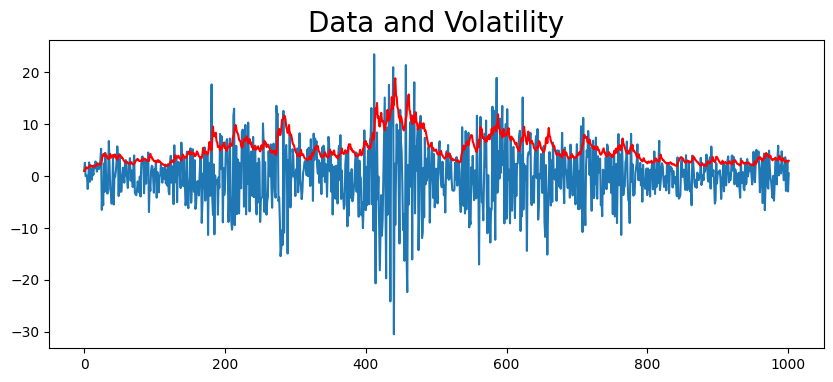

In [7]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

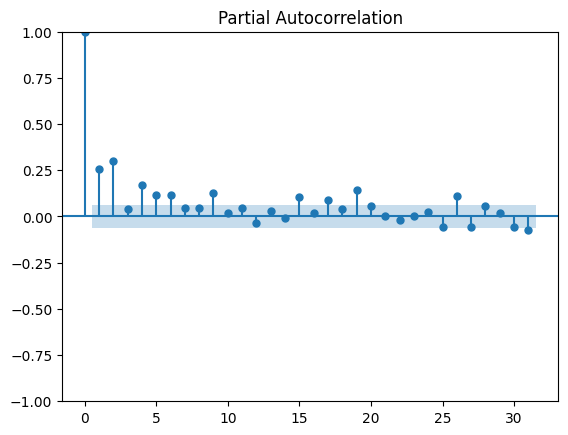

In [8]:
plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [9]:
train, test = series[:-test_size], series[-test_size:]

In [10]:
model = arch_model(train, p=2, q=2)

In [11]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 1951769.4181177546
Iteration:      2,   Func. Count:     17,   Neg. LLF: 103206.50351499477
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2716.187599551737
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2714.807163921946
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2689.767478634428
Iteration:      6,   Func. Count:     49,   Neg. LLF: 2690.2735962729907
Iteration:      7,   Func. Count:     57,   Neg. LLF: 2695.54993944571
Iteration:      8,   Func. Count:     65,   Neg. LLF: 2899.044038887213
Iteration:      9,   Func. Count:     74,   Neg. LLF: 2689.858920397059
Iteration:     10,   Func. Count:     82,   Neg. LLF: 2689.323333383396
Iteration:     11,   Func. Count:     89,   Neg. LLF: 2689.321449577311
Iteration:     12,   Func. Count:     96,   Neg. LLF: 2689.321378625358
Iteration:     13,   Func. Count:    103,   Neg. LLF: 2689.3213698681902
Iteration:     14,   Func. Count:    109,   Neg. LLF: 2689.32

In [12]:
model_fit.summary()

/home/sampersie/.local/lib/python3.10/site-packages/arch/univariate/base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
/home/sampersie/.local/lib/python3.10/site-packages/arch/univariate/base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
/home/sampersie/.local/lib/python3.10/site-packages/arch/univariate/base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2689.32
Distribution:                  Normal   AIC:                           5390.64
Method:            Maximum Likelihood   BIC:                           5419.47
                                        No. Observations:                  902
Date:                Wed, Dec 20 2023   Df Residuals:                      901
Time:                        13:25:04   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0678      0.123      0.550      0.583 [ -0.174,  0.310]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.6007      0.231      2.599  9.344e-03    [  0.148,  1.054]
alpha[1]       0.1007  3.543e-02      2.841  4.493e-03  [3.123e-02,  0.170]
alpha[2]       0.1981  3.599e-02      5.503  3.733e-08    [  0.128,  0.269]
beta[1]        0.1059      0.104      1.015      0.310 [-9.869e-02,  0.311]
beta[2]        0.5911  9.679e-02      6.107  1.013e-09    [  0.401,  0.781]
===========================================================================

Covariance estimator: robust
"""

# Predict

In [13]:
predictions = model_fit.forecast(horizon=test_size)

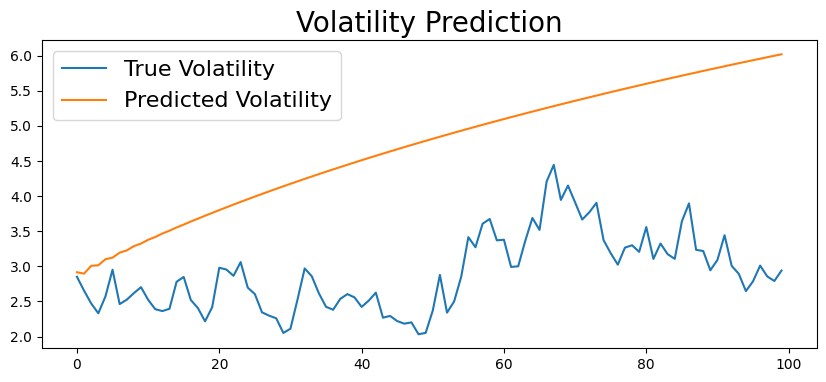

In [14]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

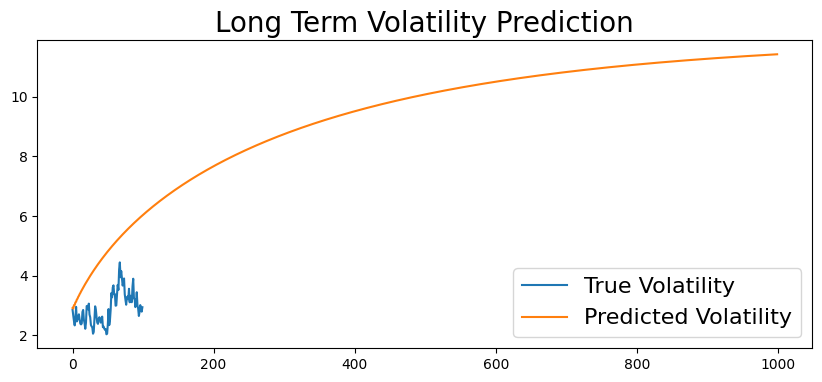

In [15]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [16]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

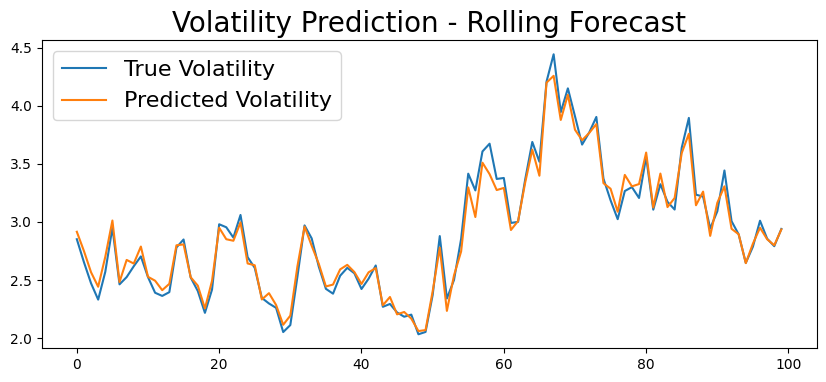

In [17]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)